# **Luis Arraez - 2022 vs 2023 season**


Vertical Approach Angle calculation (VAA):

**vy_f** = -sqrt(vy0² – (2 * ay * (y0 – yf))), 
**t** = (vy_f – vy0) / ay, 
**vz_f** = vz0 + (az * t), 
**VAA** = -arctan(vz_f/vy_f) * (180 / pi)

----

### **Statcast** ([CSV Documentation](https://baseballsavant.mlb.com/csv-docs))

- vy0 = The velocity of the pitch, in feet per second, in y-dimension*, determined at y=50 feet. (*toward home plate)
- ay = The acceleration of the pitch, in feet per second per second, in y-dimension, determined at y=50 feet.
- y0 = 50 (“y=50 feet”).
- yf = 17/12 (home plate, converted to inches).
- vz0 = The velocity of the pitch, in feet per second, in z-dimension**, determined at y=50 feet. (**vertically)
- az = The acceleration of the pitch, in feet per second per second, in z-dimension, determined at y=50 feet.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.table import Table
import seaborn as sns
import numpy as np
from math import sqrt, atan, degrees

# **2022 season**

In [4]:
mlb_2022 = pd.read_csv('arraez-2022.csv')
mlb_2022['pitch_name'] = mlb_2022['pitch_name'].str.replace('4-Seam Fastball', 'Four-Seam')


#def gravity_adjustment(speed):
    #return (523 / speed) ** 2

#def calculate_ivb(pfx_z_inches, release_speed):
    # Calcular el ajuste por gravedad en pulgadas
    #gravity_adjustment_inches = gravity_adjustment(release_speed)
    # Calcular el movimiento vertical inducido (iVB)
    #ivb = gravity_adjustment_inches - pfx_z_inches 
    #return ivb

#mlb_2022['ivb'] = mlb_2022.apply(lambda row: calculate_ivb(row['pfx_z_inches'], row['release_speed']), axis=1)

# Guardar el DataFrame actualizado en un nuevo archivo CSV
#mlb_2022.to_csv('your_file_with_ivb.csv', index=False)

# Mostrar el DataFrame actualizado
mlb_2022.head()



,pitch_name,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,bat_speed,swing_length,count,pfx_z_inches,pfx_x_inches
0,Four-Seam,2022-10-05,91.9,-1.79,6.39,"Arraez, Luis",650333,663436,walk,ball,...,Standard,Standard,207,-0.007,0.245,NaN,NaN,3-1,15.12,2.16
1,Changeup,2022-10-05,86.3,-2.16,6.20,"Arraez, Luis",650333,663436,NaN,ball,...,Standard,Standard,231,0.000,0.114,NaN,NaN,2-1,8.16,11.40
2,Four-Seam,2022-10-05,91.6,-1.74,6.38,"Arraez, Luis",650333,663436,NaN,called_strike,...,Standard,Standard,212,0.000,-0.056,NaN,NaN,2-0,14.16,5.16
3,Four-Seam,2022-10-05,92.7,-1.60,6.39,"Arraez, Luis",650333,663436,NaN,ball,...,Standard,Standard,206,0.000,0.063,NaN,NaN,1-0,14.88,5.28
4,Curveball,2022-10-05,76.6,-1.73,6.56,"Arraez, Luis",650333,663436,NaN,ball,...,Standard,Standard,29,0.000,0.033,NaN,NaN,0-0,-14.76,-7.56


In [5]:
fastballs = ['Four-Seam', 'Sinker', 'Cutter']
breaking_balls = ['Curveball', 'Knuckle Curve', 'Slider', 'Sweeper', 'Slurve', 'Knuckleball']
offspeed_balls = ['Changeup', 'Split-Finger', 'Forkball', 'Screwball']

mlb_2022['pitch_type_group'] = np.where(mlb_2022['pitch_name'].isin(fastballs), 'Fastballs', 
                                    np.where(mlb_2022['pitch_name'].isin(breaking_balls), 'Breaking ball', 
                                             np.where(mlb_2022['pitch_name'].isin(offspeed_balls), 'Offspeed', 'Other')))

# Filtrar los lanzamientos no categorizados
data = mlb_2022[mlb_2022['pitch_type_group'] != 'Other']

pitch_count_by_type = data['pitch_type_group'].value_counts()
# Mostrar los resultados
print(pitch_count_by_type)

pitch_type_group
Fastballs        1484
Breaking ball     586
Offspeed          339
Name: count, dtype: int64


In [6]:

fastballs_data = mlb_2022[mlb_2022['pitch_name'].isin(fastballs)]
#fastballs_data['pfx_z_inches'] = fastballs_data['pfx_z'] * 12
#fastballs_data['pfx_x_inches'] = fastballs_data['pfx_x'] * -12



# Definir la posición vertical final en pulgadas
yf_inches = 17 / 12  # Convertir a pulgadas (1 pie = 12 pulgadas)

# Calcular el ángulo de aproximación vertical (VAA) para cada fila en el DataFrame
def calcular_vaa(row):
    vy0 = row['vy0']  # Velocidad vertical inicial
    vz0 = row['vz0']  # Velocidad vertical inicial
    ay = row['ay']  # Aceleración vertical
    az = row['az']  # Aceleración vertical
    vy_f = -sqrt(vy0**2 - 2 * ay * (50 - yf_inches))  # Velocidad vertical final
    t = (vy_f - vy0) / ay  # Tiempo de vuelo
    vz_f = vz0 + (az * t)  # Velocidad vertical final
    VAA = -degrees(atan(vz_f / vy_f))  # Ángulo de aproximación vertical en grados
    return VAA

def calcular_haa(row):
    vx0 = row['vx0']  # Velocidad horizontal inicial
    vy0 = row['vy0']  # Velocidad vertical inicial
    ax = row['ax']  # Aceleración horizontal
    ay = row['ay']  # Aceleración vertical
    vy_f = -sqrt(vy0**2 - 2 * ay * (50 - yf_inches))  # Velocidad vertical final (ya calculada en VAA)
    t = (vy_f - vy0) / ay  # Tiempo de vuelo (ya calculado en VAA)
    vx_f = vx0 + (ax * t)  # Velocidad horizontal final
    HAA = -degrees(atan(vx_f / vy_f))  # Ángulo de aproximación horizontal en grados
    return HAA

# Aplicar la función calcular_vaa a cada fila del DataFrame
fastballs_data['Vertical Approach Angle'] = fastballs_data.apply(calcular_vaa, axis=1)
fastballs_data['Horizontal Approach Angle'] = fastballs_data.apply(calcular_haa, axis=1)
# Mostrar los resultados agrupados por tipo de lanzamiento
print("Resumen de Vertical Approach Angle para cada tipo de Fastball:")
print(fastballs_data.groupby('pitch_name')['Vertical Approach Angle'].mean())

Resumen de Vertical Approach Angle para cada tipo de Fastball:
pitch_name
Cutter      -6.451587
Four-Seam   -4.954036
Sinker      -5.749956
Name: Vertical Approach Angle, dtype: float64


C:\Users\sedem\AppData\Local\Temp\ipykernel_15444\1371444212.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fastballs_data['Vertical Approach Angle'] = fastballs_data.apply(calcular_vaa, axis=1)
C:\Users\sedem\AppData\Local\Temp\ipykernel_15444\1371444212.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fastballs_data['Horizontal Approach Angle'] = fastballs_data.apply(calcular_haa, axis=1)


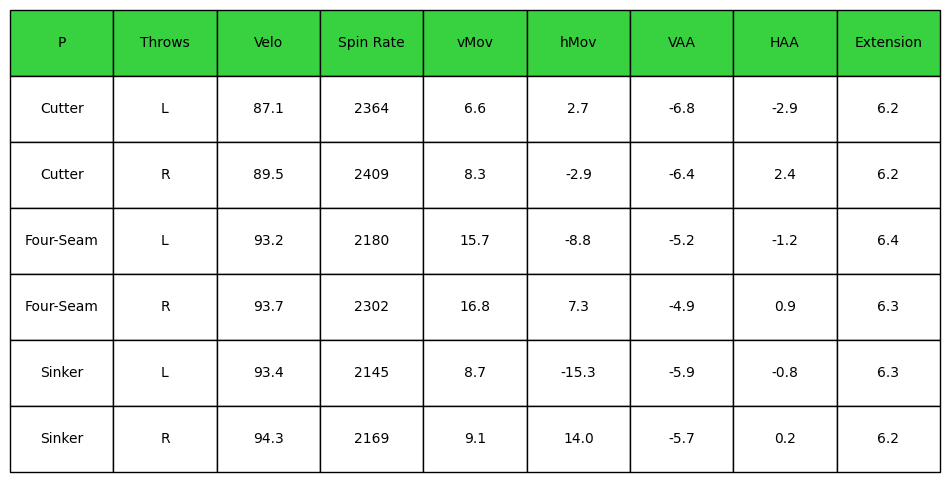

In [7]:

summary_table = fastballs_data.groupby(['pitch_name', 'p_throws']).agg({
    'release_speed': lambda x: round(np.mean(x), 1),
    'release_spin_rate': lambda x: int(np.mean(x)),
    'pfx_z_inches': lambda x: round(np.mean(x), 1),
    'pfx_x_inches': lambda x: round(np.mean(x), 1),
    #'spin_axis': lambda x: round(np.mean(x), 1),
    'Vertical Approach Angle': lambda x: round(np.mean(x), 1),
    'Horizontal Approach Angle': lambda x: round(np.mean(x), 1),
    #'effective_speed': lambda x: round(np.mean(x), 1),
    'release_extension': lambda x: round(np.mean(x), 1)
}).reset_index()

summary_table.columns = ['P', 'Throws', 'Velo', 'Spin Rate', 'vMov', 'hMov', 'VAA', 'HAA' , 'Extension']

fig, ax = plt.subplots(figsize=(12, 6))  # Ajustar el tamaño de la imagen según sea necesario
ax.axis('off')

# Crear una tabla en matplotlib
tbl = Table(ax, bbox=[0, 0, 1, 1])

# Añadir las cabeceras
ncols = summary_table.shape[1]
nrows = summary_table.shape[0] + 1

# Ajustar el tamaño de las celdas
width, height = 50 / ncols, 1.0 / nrows

fontsize = 30
fontweight = 'bold'

# Añadir las cabeceras
for i, column in enumerate(summary_table.columns):
    tbl.add_cell(0, i, width, height, text=column, loc='center', facecolor='#38d140')

# Añadir las filas
for row_idx, row in summary_table.iterrows():
    for col_idx, value in enumerate(row):
        tbl.add_cell(row_idx + 1, col_idx, width, height, text=value, loc='center', facecolor='white')

ax.add_table(tbl)

# Guardar la imagen
#plt.savefig('/mnt/data/summary_table.png', bbox_inches='tight', dpi=300)

# Mostrar la imagen
plt.show()

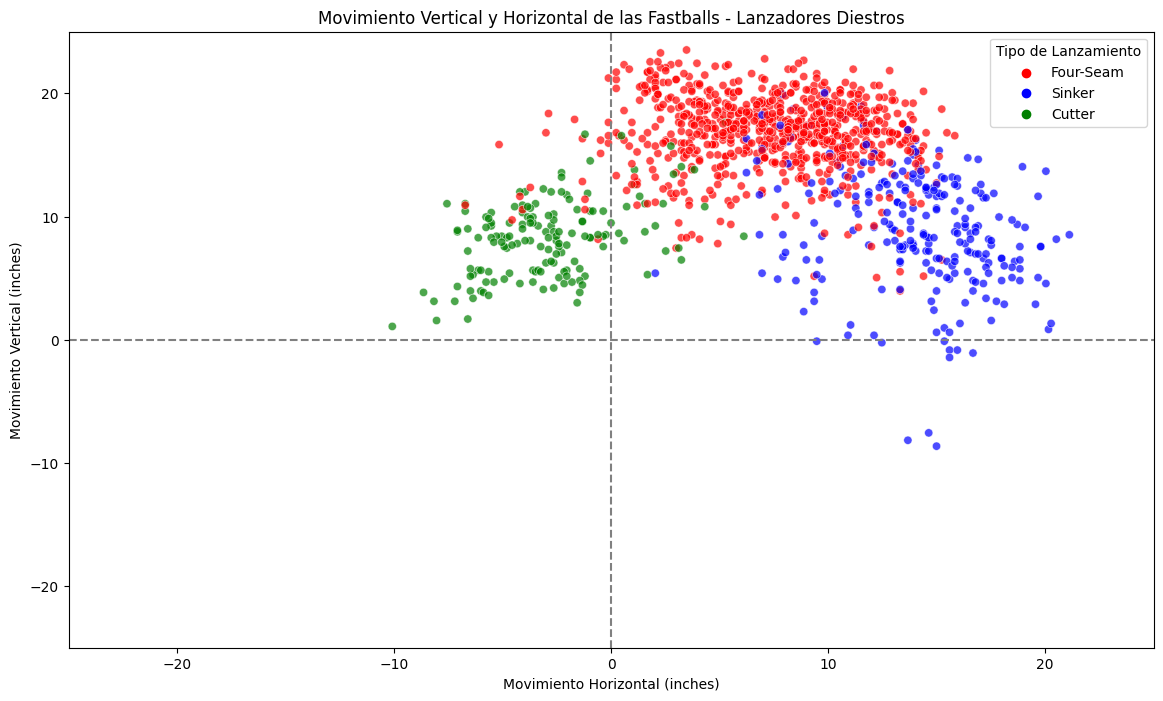

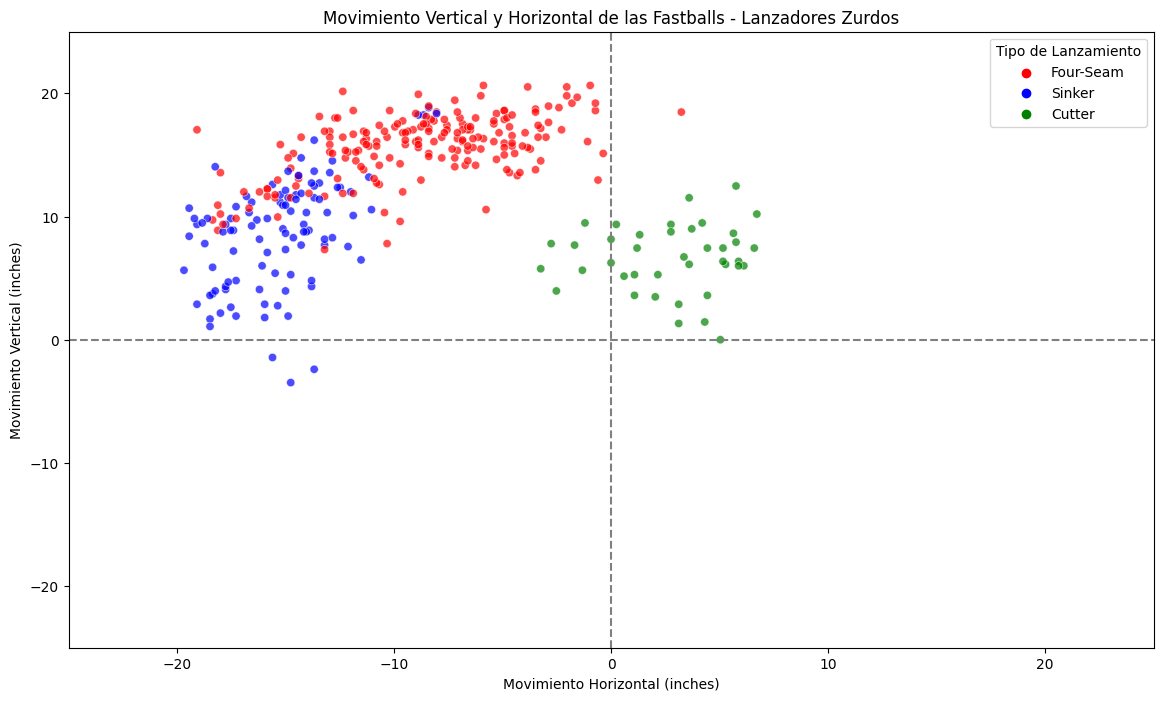

In [8]:

# Separar los datos por lanzadores diestros (R) y zurdos (L)
fastballs_data_R = fastballs_data[fastballs_data['p_throws'] == 'R']
fastballs_data_L = fastballs_data[fastballs_data['p_throws'] == 'L']

# Colores vivos para los tipos de lanzamiento
pitch_palette = {'Four-Seam': 'red', 'Sinker': 'blue', 'Cutter': 'green'}

# Graficar para lanzadores diestros (R)
plt.figure(figsize=(14, 8))
sns.scatterplot(data=fastballs_data_R, x='pfx_x_inches', y='pfx_z_inches', hue='pitch_name', palette=pitch_palette, alpha=0.7)
plt.title('Movimiento Vertical y Horizontal de las Fastballs - Lanzadores Diestros')
plt.xlabel('Movimiento Horizontal (inches)')
plt.ylabel('Movimiento Vertical (inches)')
plt.axhline(0, color='grey', linestyle='--')
plt.axvline(0, color='grey', linestyle='--')
plt.xlim(-25, 25)  # Establecer límites personalizados para el eje x
plt.ylim(-25, 25)  # Establecer límites personalizados para el eje y
plt.legend(title='Tipo de Lanzamiento')
plt.show()

# Graficar para lanzadores zurdos (L)
plt.figure(figsize=(14, 8))
sns.scatterplot(data=fastballs_data_L, x='pfx_x_inches', y='pfx_z_inches', hue='pitch_name', palette=pitch_palette, alpha=0.7)
plt.title('Movimiento Vertical y Horizontal de las Fastballs - Lanzadores Zurdos')
plt.xlabel('Movimiento Horizontal (inches)')
plt.ylabel('Movimiento Vertical (inches)')
plt.axhline(0, color='grey', linestyle='--')
plt.axvline(0, color='grey', linestyle='--')
plt.xlim(-25, 25)  # Establecer límites personalizados para el eje x
plt.ylim(-25, 25)  # Establecer límites personalizados para el eje y
plt.legend(title='Tipo de Lanzamiento')
plt.show()

In [17]:
pitch_categories = {
    'Riser': {'hMov': 6.4, 'vMov': 18.6},
    'Runner': {'hMov': 16.7, 'vMov': 8.1},
    'Four-Seam': {'hMov': 10.7, 'vMov': 16.7},
    'Sinker': {'hMov': 16.2, 'vMov': 2.7},
    'Backspinner': {'hMov': 1.7, 'vMov': 16.5},
    'Gyro Fastball': {'hMov': 6.7, 'vMov': 14.3},
    'Fastball': {'hMov': 14.8, 'vMov': 12.5},
    'Turbo Sinker': {'hMov': 12.4, 'vMov': -8.1},
}

# Función para asignar una subcategoría según hMov y vMov
def classify_pitch(row, categories):
    hMov = row['pfx_x_inches']  # Asume que pfx_x es el movimiento horizontal en pulgadas
    vMov = row['pfx_z_inches']  # Asume que pfx_z es el movimiento vertical en pulgadas
    min_distance = float('inf')
    category = None
    for cat, limits in categories.items():
        distance = ((hMov - limits['hMov']) ** 2 + (vMov - limits['vMov']) ** 2) ** 0.5
        if distance < min_distance:
            min_distance = distance
            category = cat
    return category

mlb_2022['pitch_category'] = mlb_2022.apply(classify_pitch, categories=pitch_categories, axis=1)

print(mlb_2022['pitch_category'].value_counts())

pitch_category
Backspinner      793
Turbo Sinker     301
Gyro Fastball    275
Four-Seam        267
Riser            224
Sinker           207
Runner           176
Fastball         170
Name: count, dtype: int64
